# NBA Shooting Data
This dataset is based on shooting statistics that can be found on [NBA.com](https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Playoffs&PerMode=Totals). It consists of shots taken by four different players during the 2021 NBA Playoffs.

#### Data Dictionary

|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the basket in ft  |
|Y        |float     |Vertical distance of the shot taken from the basket in ft    |
|RANGE    |String    |Radius range of the shot taken from the basket in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import warnings
color = sns.color_palette()
warnings.filterwarnings('ignore')

## Load Data

In [32]:
df = pd.read_csv('nba_players_shooting.csv', index_col=0)
display(df.head())

,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
INDEX,,,,,,
0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE
1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE
2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE
3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE
4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE


## Understanding Variables

In [33]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
display(variables)

,Variable,Number of unique values,values
0,SHOOTER,4,"[Seth Curry, Chris Paul, Russell Westbrook, Tr..."
1,X,719,"[-3.808987264612848, -0.1042785818707121, -0.5..."
2,Y,776,"[5.5836210329779306, 5.919137999129865, 8.9122..."
3,RANGE,6,"[(0, 4), (5, 9), (10, 14), (15, 19), (20, 24),..."
4,DEFENDER,4,"[Chris Paul, Trae Young, Russell Westbrook, Se..."
5,SCORE,2,"[MADE, MISSED]"


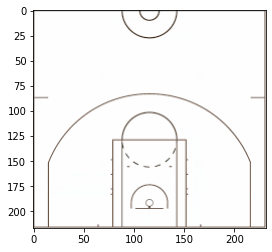

In [34]:
im = plt.imread('nba_court.png')
width = im.shape[0]
height = im.shape[1]
plt.imshow(im)
plt.show()

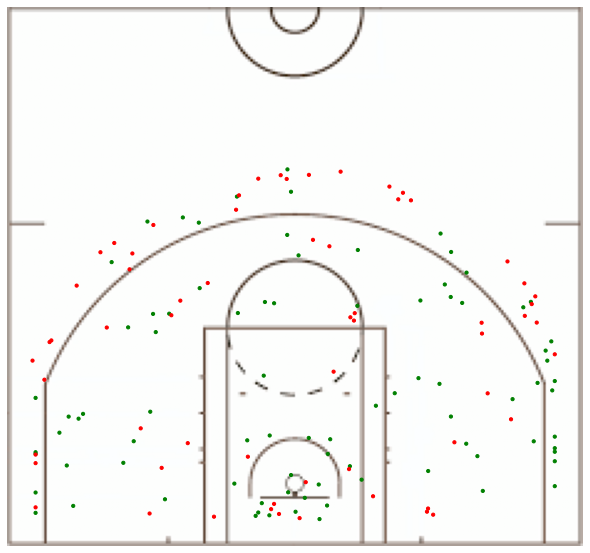

In [35]:
# Create figure and axes
fig = plt.figure(figsize=(8, 8/width*height))
ax = fig.add_axes([0, 0, 1, 1])

ax.imshow(im)
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')


df = (
    df
        # width of NBA court in ft = 50
        .assign(x_rescale  = lambda x : (x['X'] / 50 + 0.535) * width)
        # half the length of NBA court in ft = 47
        .assign(y_rescale  = lambda x : (1 - x['Y'] / 47) * height)
)

 
df_player = (
    df
        .query('SHOOTER == "Seth Curry"')
        .assign(color = lambda x : x['SCORE'].map({'MADE': 'green', 'MISSED': 'red'}))
) 


ax.scatter(
    df_player['x_rescale'], 
    df_player['y_rescale'], 
    s=10, 
    c=df_player['color'].tolist())

plt.show()